# Decision Tree classification

Decision tree is a type of supervised learning algorithm (having a pre-defined target variable) that is mostly used in classification problems. It works for both categorical and continuous input and output variables. In this technique

![alt text](https://raw.githubusercontent.com/praneethmetuku/file/master/Decision_Tree_2.png)

The root node consists of the entire set of data. A segment or branch is formed by a splitting rule on the data above. A node which branches out is called a decision node. Bottom nodes which do not branch out are called leaves

Given their transparency and relatively low computational cost, Decision Trees are also very useful for exploring your data before applying other algorithms. They're helpful for checking the quality of engineered features and identifying the most relevant ones by visualising the resulting tree

![alt text](https://image.slidesharecdn.com/decisiontreesandrandomforests-150504111904-conversion-gate02/95/decision-trees-and-random-forests-9-638.jpg?cb=1430739960)

The main downsides of Decision Trees are their tendency to over-fit, their inability to grasp relationships between features, and the use of greedy learning algorithms (not guaranteed to find the global optimal model). Using them in a Random Forest helps mitigate some of this issues

# Random Forest

![alt text](https://image.slidesharecdn.com/decisiontreesandrandomforests-150504111904-conversion-gate02/95/decision-trees-and-random-forests-19-638.jpg?cb=1430739960)

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees

![alt text](https://raw.githubusercontent.com/praneethmetuku/file/master/randomf.PNG)

# Decision Trees Example-1 Titanic dataset

# Step-1 load import statements

In [154]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Step-2 load dataset

In [155]:
train=pd.read_csv('https://raw.githubusercontent.com/praneethmetuku/file/master/titanic_train.csv')
test=pd.read_csv('https://raw.githubusercontent.com/praneethmetuku/file/master/titanic_test.csv')

In [156]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [157]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Replacing 177 missing values in age column with avg age

In [158]:
avg=train["Age"].mean()
train['Age'].fillna(value=avg,inplace=True)

We will drop the cabin column since it has many missing values

In [159]:
train.drop('Cabin',axis=1,inplace=True)

we will drop the missing values in embarked column since it has only 2 missing values


In [160]:
train.dropna(inplace=True)

In [161]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### SEx and embarked is a categorical values

In [162]:
Embarked_cat=pd.get_dummies(train['Embarked'],drop_first=True)
Embarked_cat

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
5,1,0
6,0,1
7,0,1
8,0,1
9,0,0


In [163]:
sex_cat=pd.get_dummies(train['Sex'],drop_first=True) #drop_first is used to prevent dummy variable trap(multi collinearity)
sex_cat

,male
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [164]:
train['sex_cat']=sex_cat
train[['Q','S']]=Embarked_cat

## Remove unwanted columns

In [165]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [166]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,sex_cat,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Step-3 visualize the data

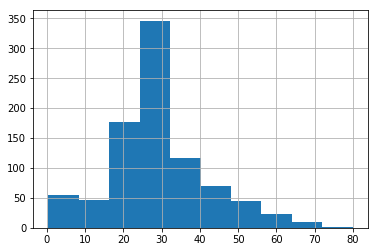

In [167]:
train['Age'].hist()

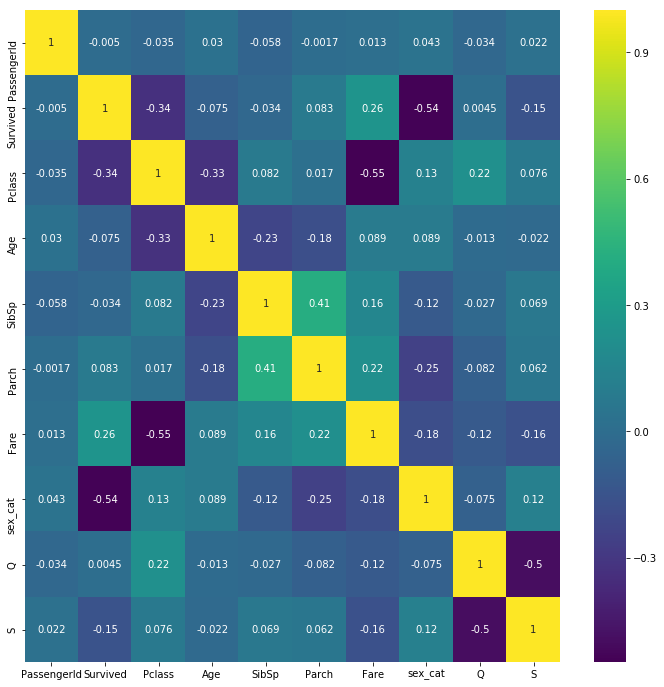

In [168]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
sns.heatmap(train.corr(),annot=True,cmap=colormap)

In [169]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,sex_cat,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [170]:
train.groupby(['Survived']).agg(['mean', 'count', 'sum'])

PassengerId                  Pclass                  Age        \
                mean count     sum      mean count   sum     mean count   
Survived                                                                  
0         447.016393   549  245412  2.531876   549  1390  30.4151   549   
1         444.358824   340  151082  1.955882   340   665  28.4236   340   

                           SibSp  ...          Fare   sex_cat               \
                   sum      mean  ...           sum      mean count    sum   
Survived                          ...                                        
0         16697.889706  0.553734  ...    12142.7199  0.852459   549  468.0   
1          9664.024118  0.476471  ...    16391.2294  0.320588   340  109.0   

                 Q                   S               
              mean count sum      mean count    sum  
Survived                                             
0         0.085610   549  47  0.777778   549  427.0  
1         0.088235   340  30  0.638235   340  217.0  

[2 rows x 27 columns]

In [171]:
p=train.groupby(['Survived']).agg(['mean', 'count', 'sum'])['sex_cat']
p

,mean,count,sum
Survived,,,
0,0.852459,549,468.0
1,0.320588,340,109.0


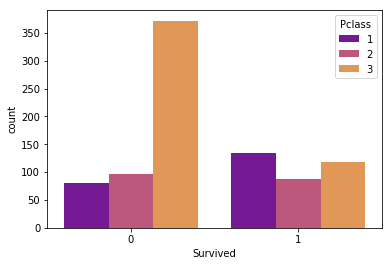

In [172]:
sns.countplot('Survived',data=train,hue='Pclass',palette='plasma')

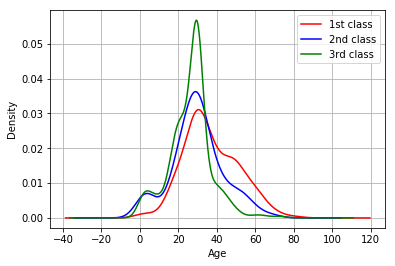

In [173]:
train[train.Pclass==1].Age.plot(kind='kde', color='r', label='1st class')
train[train.Pclass==2].Age.plot(kind='kde', color='b', label='2nd class')
train[train.Pclass==3].Age.plot(kind='kde', color='g',label='3rd class')
plt.xlabel('Age')
plt.legend(loc='best')
plt.grid()

## Step-4 split data into train and test

In [174]:
x = train.drop("Survived", axis=1)
y = train["Survived"]

In [175]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3)

In [176]:
x_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,sex_cat,Q,S
350,351,3,23.000000,0,0,9.2250,1,0,1
256,257,1,29.699118,0,0,79.2000,0,0,0
380,381,1,42.000000,0,0,227.5250,0,0,0
2,3,3,26.000000,0,0,7.9250,0,0,1
776,777,3,29.699118,0,0,7.7500,1,1,0
76,77,3,29.699118,0,0,7.8958,1,0,1
93,94,3,26.000000,1,2,20.5750,1,0,1
12,13,3,20.000000,0,0,8.0500,1,0,1
54,55,1,65.000000,0,1,61.9792,1,0,0
553,554,3,22.000000,0,0,7.2250,1,0,0


# Step-5 fitting and predicting 

In [177]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy')

In [178]:
#cross validation
from sklearn.cross_validation import cross_val_score
cvs=cross_val_score(dt,x,y,cv=7)
cvs.mean()

0.7530043677576017

In [179]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [180]:
y_predtest=dt.predict(x_test)

## Step-6 Evaluating the model

In [181]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predtest)
cm

array([[146,  34],
       [ 33,  84]], dtype=int64)

In [182]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_predtest)
print(cr)

             precision    recall  f1-score   support

          0       0.82      0.81      0.81       180
          1       0.71      0.72      0.71       117

avg / total       0.77      0.77      0.77       297



In [183]:
from sklearn.metrics import accuracy_score
accuracy_test= accuracy_score(y_test, y_predtest)
print(accuracy_test)

0.7744107744107744


# Random Forest Example-1 Titanic dataset


### Step:-1,2,3,4 is same as above example-1(decision tree)

### Step-5 Fitting and predicting

In [184]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier(n_estimators=999,criterion='entropy')
rc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=999, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [185]:
y_predtest=rc.predict(x_test)

In [186]:
y_predtest

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int6

## Step-6 Evaluating the model

In [187]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predtest)
cm

array([[160,  20],
       [ 30,  87]], dtype=int64)

In [188]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_predtest)
print(cr)

             precision    recall  f1-score   support

          0       0.84      0.89      0.86       180
          1       0.81      0.74      0.78       117

avg / total       0.83      0.83      0.83       297



In [189]:
from sklearn.metrics import accuracy_score
accuracy_test= accuracy_score(y_test, y_predtest)
print(accuracy_test)

0.8316498316498316


# Decision Trees Example-2 Iris dataset

In [190]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [191]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [192]:
iris.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

In [193]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


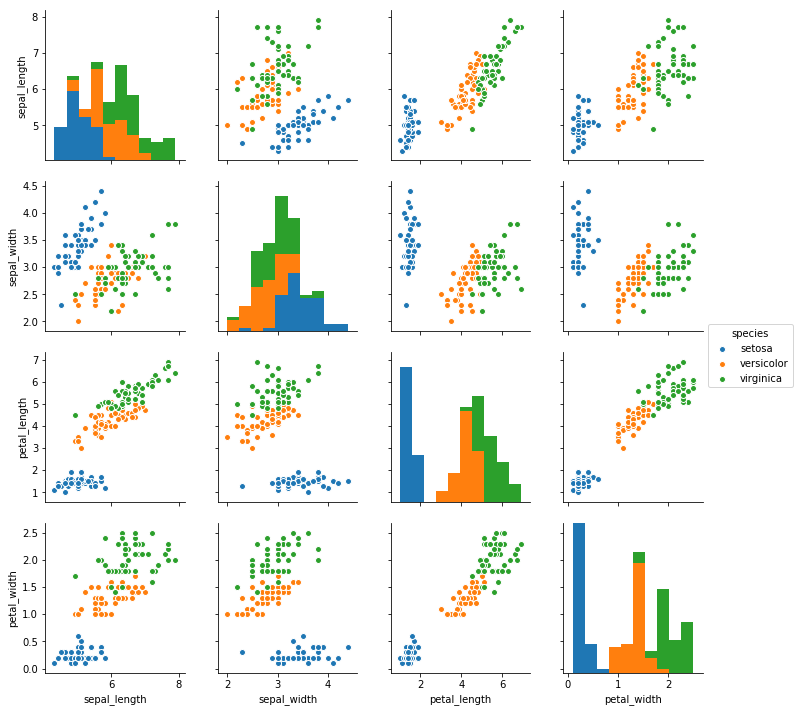

In [194]:
sns.pairplot(iris,hue='species')

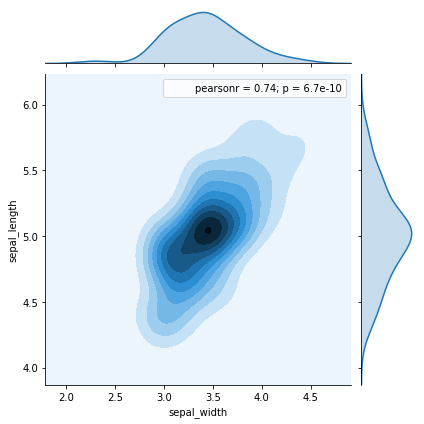

In [195]:
setosa = iris[iris['species']=='setosa']
sns.jointplot( setosa['sepal_width'], setosa['sepal_length'],kind='kde')

In [196]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [197]:
x = iris[['sepal_length','sepal_width','petal_length','petal_width']]
y = iris['species']
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
5         setosa
6         setosa
7         setosa
8         setosa
9         setosa
10        setosa
11        setosa
12        setosa
13        setosa
14        setosa
15        setosa
16        setosa
17        setosa
18        setosa
19        setosa
20        setosa
21        setosa
22        setosa
23        setosa
24        setosa
25        setosa
26        setosa
27        setosa
28        setosa
29        setosa
         ...    
120    virginica
121    virginica
122    virginica
123    virginica
124    virginica
125    virginica
126    virginica
127    virginica
128    virginica
129    virginica
130    virginica
131    virginica
132    virginica
133    virginica
134    virginica
135    virginica
136    virginica
137    virginica
138    virginica
139    virginica
140    virginica
141    virginica
142    virginica
143    virginica
144    virginica
145    virginica
146    virginica
147    virgini

In [198]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=13)
x_test

,sepal_length,sepal_width,petal_length,petal_width
55,5.7,2.8,4.5,1.3
64,5.6,2.9,3.6,1.3
21,5.1,3.7,1.5,0.4
101,5.8,2.7,5.1,1.9
112,6.8,3.0,5.5,2.1
33,5.5,4.2,1.4,0.2
135,7.7,3.0,6.1,2.3
123,6.3,2.7,4.9,1.8
46,5.1,3.8,1.6,0.2
90,5.5,2.6,4.4,1.2


In [199]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy')
dt

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [200]:
#cross validation
from sklearn.cross_validation import cross_val_score
cvs=cross_val_score(dt,x,y,cv=7)
cvs.mean()

0.9464285714285714

In [201]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [202]:
y_predtest=dt.predict(x_test)

In [203]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predtest)
cm

array([[14,  0,  0],
       [ 0, 12,  0],
       [ 0,  2, 17]], dtype=int64)

In [204]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_predtest)
print(cr)

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        14
 versicolor       0.86      1.00      0.92        12
  virginica       1.00      0.89      0.94        19

avg / total       0.96      0.96      0.96        45



In [205]:
from sklearn.metrics import accuracy_score
accuracy_test= accuracy_score(y_test, y_predtest)
print(accuracy_test)

0.9555555555555556


# Random Forest Example-2 Iris dataset


## Step:-1,2,3,4 is same as above example-1(decision tree)

In [218]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier(n_estimators=5999,criterion='entropy')
rc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5999, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [219]:
y_predtest=rc.predict(x_test)

In [220]:
y_predtest

array(['versicolor', 'versicolor', 'setosa', 'virginica', 'virginica',
       'setosa', 'virginica', 'virginica', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'setosa', 'virginica', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'setosa', 'virginica', 'versicolor', 'virginica',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'virginica', 'virginica'],
      dtype=object)

In [221]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predtest)
cm

array([[14,  0,  0],
       [ 0, 12,  0],
       [ 0,  1, 18]], dtype=int64)

In [222]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_predtest)
print(cr)

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        14
 versicolor       0.92      1.00      0.96        12
  virginica       1.00      0.95      0.97        19

avg / total       0.98      0.98      0.98        45



In [223]:
from sklearn.metrics import accuracy_score
accuracy_test= accuracy_score(y_test, y_predtest)
print(accuracy_test)

0.9777777777777777


# Decision Trees Example-3 Diabetes dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/praneethmetuku/file/master/diabetes.csv')

In [3]:
data.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,positive
1,1,85,66,29,0,26.6,0.351,31,negative
2,8,183,64,0,0,23.3,0.672,32,positive
3,1,89,66,23,94,28.1,0.167,21,negative
4,0,137,40,35,168,43.1,2.288,33,positive


In [4]:
data.isnull().sum()

Number of times pregnant        0
Plasma glucose concentration    0
Diastolic blood pressure        0
Triceps skin fold thickness     0
2-Hour serum insulin            0
Body mass index                 0
Diabetes pedigree function      0
Age                             0
Class                           0
dtype: int64

In [5]:
clas=pd.get_dummies(data['Class'],drop_first=True)
print(clas)
data['class']=clas

     positive
0           1
1           0
2           1
3           0
4           1
5           0
6           1
7           0
8           1
9           1
10          0
11          1
12          0
13          1
14          1
15          1
16          1
17          1
18          0
19          1
20          0
21          0
22          1
23          1
24          1
25          1
26          1
27          0
28          0
29          0
..        ...
738         0
739         1
740         1
741         0
742         0
743         1
744         0
745         0
746         1
747         0
748         1
749         1
750         1
751         0
752         0
753         1
754         1
755         1
756         0
757         1
758         0
759         1
760         0
761         1
762         0
763         0
764         0
765         0
766         1
767         0

[768 rows x 1 columns]


In [6]:
data.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Class,class
0,6,148,72,35,0,33.6,0.627,50,positive,1
1,1,85,66,29,0,26.6,0.351,31,negative,0
2,8,183,64,0,0,23.3,0.672,32,positive,1
3,1,89,66,23,94,28.1,0.167,21,negative,0
4,0,137,40,35,168,43.1,2.288,33,positive,1


In [7]:
data.drop('Class',axis=1,inplace=True)
data.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


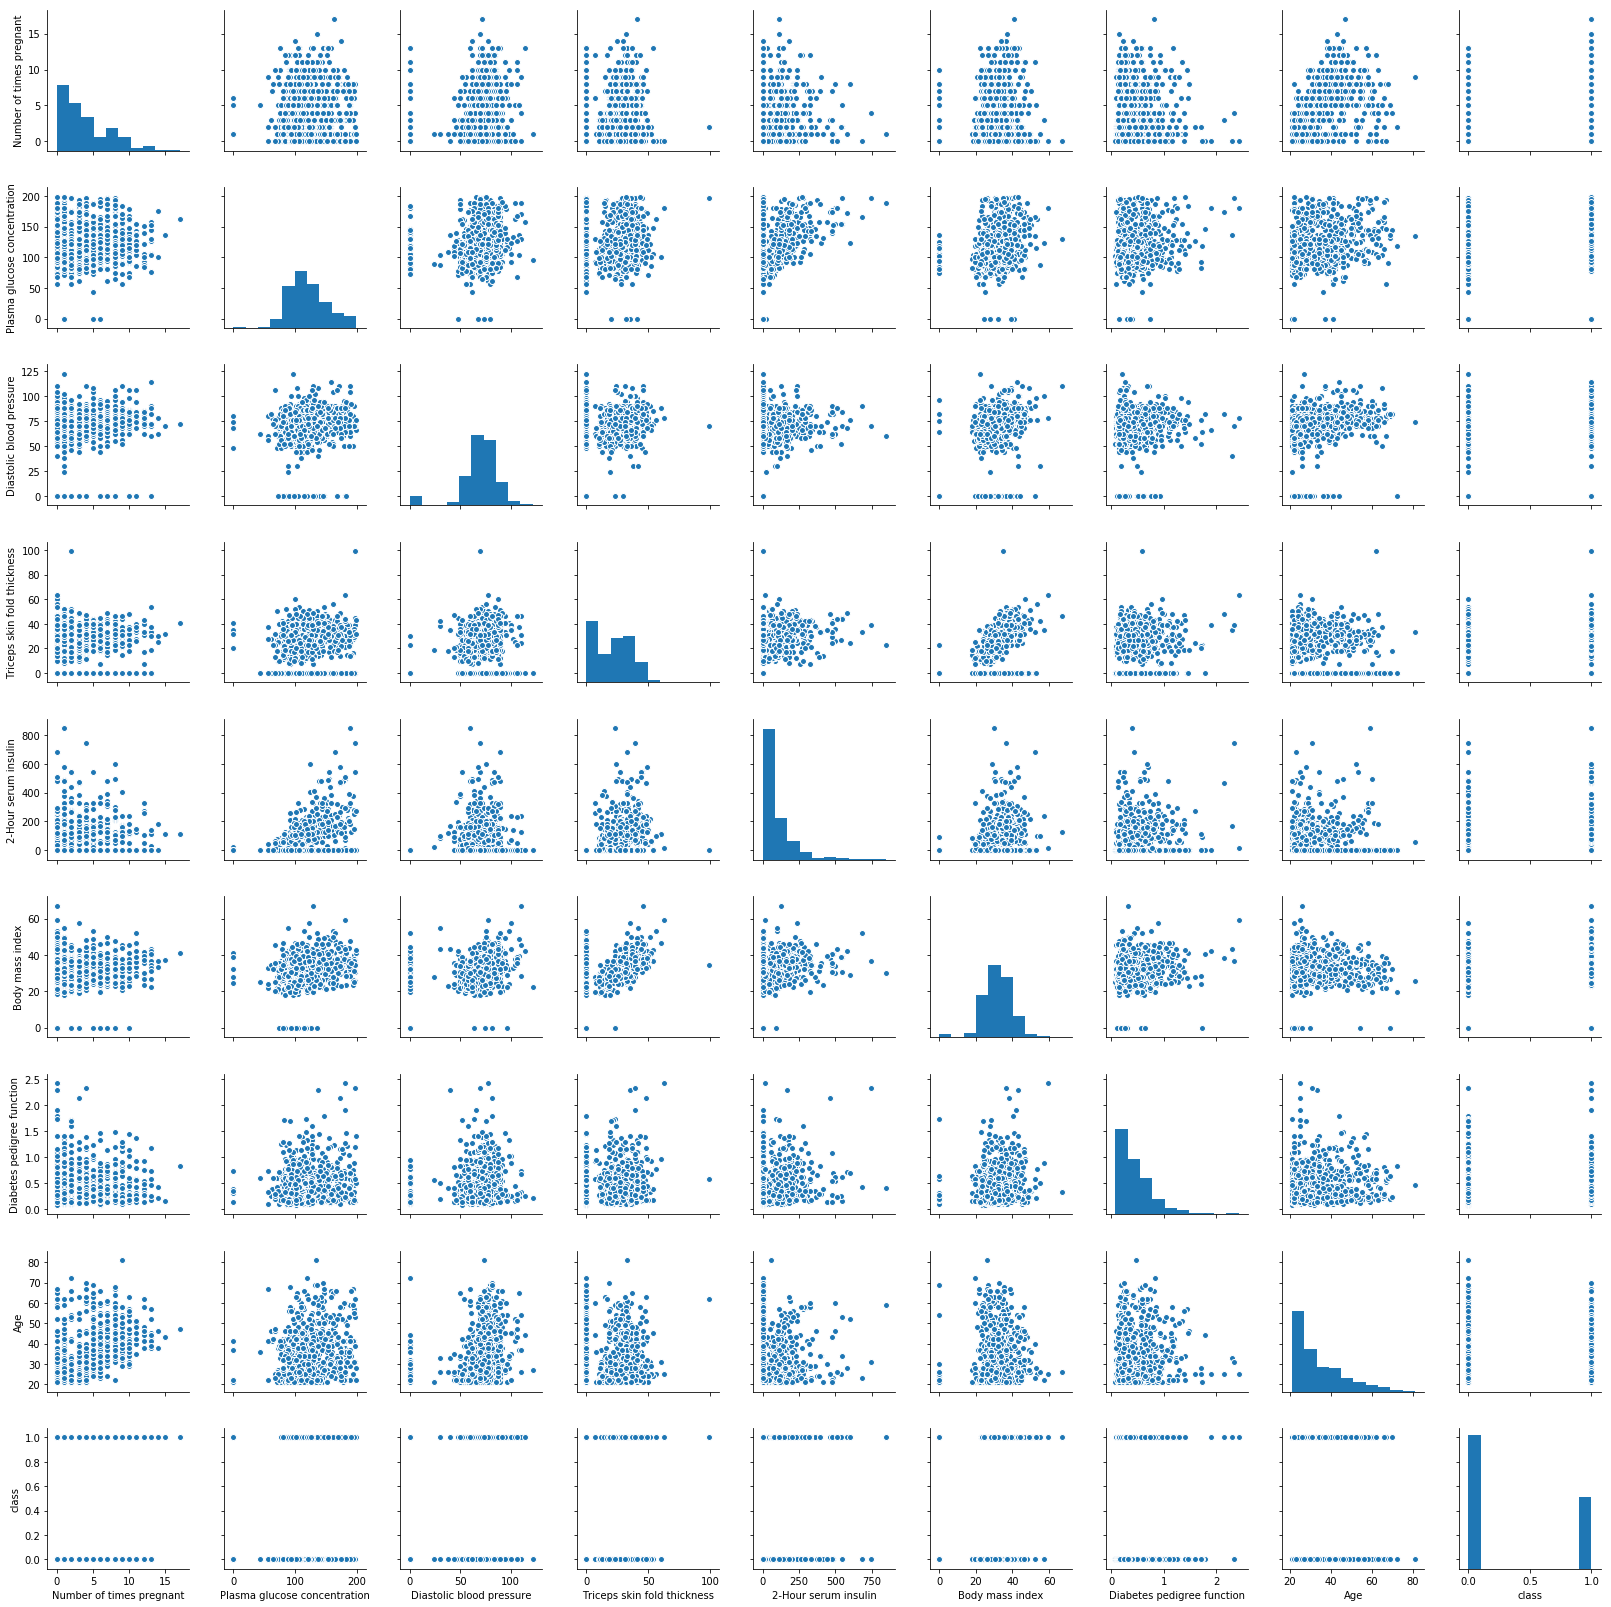

In [8]:
sns.pairplot(data)

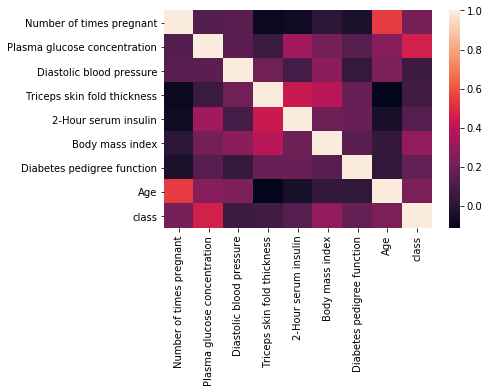

In [9]:
sns.heatmap(data.corr())

In [10]:
from sklearn.model_selection import train_test_split
x=data.drop('class',axis=1)
y=data['class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=12)

In [11]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy')
dt

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [12]:
#cross validation
from sklearn.cross_validation import cross_val_score
cvs=cross_val_score(dt,x,y,cv=7)
cvs.mean()

C:\Users\metuk\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.7032855564965657

In [13]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
y_predtest=dt.predict(x_test)

In [15]:
y_predtest

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1], dtype=uint8)

In [16]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_predtest)
cr=classification_report(y_test,y_predtest)
print(cr)
cm

             precision    recall  f1-score   support

          0       0.73      0.74      0.73       160
          1       0.55      0.54      0.55        96

avg / total       0.66      0.66      0.66       256



array([[118,  42],
       [ 44,  52]], dtype=int64)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_test= accuracy_score(y_test, y_predtest)
print(accuracy_test)

0.6640625


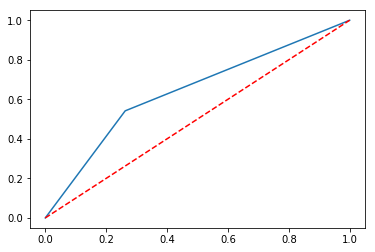

In [18]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predtest)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')

# Random forest Example-3 Diabetes dataset

### Step:-1,2,3,4 is same as above example-1(decision tree)

In [19]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier(n_estimators=5999,criterion='entropy')
rc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5999, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
y_predtest=rc.predict(x_test)

In [21]:
y_predtest

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1], dtype=uint8)

In [22]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predtest)
cm

array([[139,  21],
       [ 36,  60]], dtype=int64)

In [23]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_predtest)
print(cr)

             precision    recall  f1-score   support

          0       0.79      0.87      0.83       160
          1       0.74      0.62      0.68        96

avg / total       0.77      0.78      0.77       256



In [24]:
from sklearn.metrics import accuracy_score
accuracy_test= accuracy_score(y_test, y_predtest)
print(accuracy_test)

0.77734375


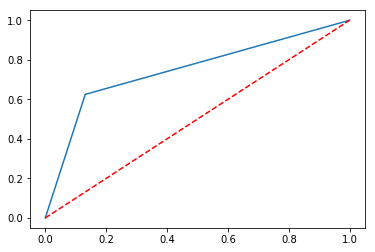

In [25]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predtest)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')